In [1]:
### Import required libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [10]:
### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the data

data = pd.read_csv('marketing.csv')
df.head(5)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,635,88,546,...,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,11,1,6,...,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,426,49,127,...,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,11,4,20,...,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,173,43,118,...,3,6,5,0,0,0,0,0,0,0


In [3]:
df.shape

(2240, 27)

In [11]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

In [5]:
### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

df.isnull().sum()/len(df)*100


ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [6]:
## treating null values
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [12]:
df.isnull().sum()/len(df)*100


ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Response               0.0
dtype: float64

In [7]:
### 4. Check if there are any duplicate records in the dataset? If any drop them.
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


In [ ]:
## No duplicates

In [8]:
### 5. Drop the columns which you think redundant for the analysis 

df=df.drop(columns=['ID','Dt_Customer'],axis=1)


In [12]:
### 6. Check the unique categories in the column 'Marital_Status'
# - i) Group categories 'Married', 'Together' as 'relationship'
# - ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [13]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married','Together'],'relationship')

In [14]:
data['Marital_Status']=data['Marital_Status'].replace(['Divorced','Widow', 'Alone', 'YOLO','Absurd'],'Single')

In [15]:
data['Marital_Status'].unique()

array(['Single', 'relationship'], dtype=object)

In [16]:
### 7. Group the columns 'MntWines', 
## 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

df['Total_Expenses']= df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']+df['MntGoldProds']

In [17]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses'],
      dtype='object')

In [18]:
### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
### and 'NumDealsPurchases' as 'Num_Total_Purchases'

df['Num_Total_Purchases']=df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']+df['NumDealsPurchases']

In [19]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases'],
      dtype='object')

In [20]:
### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'
df['Kids']=df['Kidhome']+df['Teenhome']

In [21]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases',
       'Kids'],
      dtype='object')

In [22]:
### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

df['TotalAcceptedCmp']=df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']

In [23]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp'],
      dtype='object')

In [24]:
### 11. Drop those columns which we have used above for obtaining new features

df=df.drop(columns=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'], axis=1)

In [25]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')

In [26]:
df=df.drop(columns=['NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'], axis=1)


In [27]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp'],
      dtype='object')

In [28]:
df=df.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'], axis=1)

In [29]:
df=df.drop(columns=['Kidhome','Teenhome'], axis =1)

In [30]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Recency',
       'NumWebVisitsMonth', 'Complain', 'Total_Expenses',
       'Num_Total_Purchases', 'Kids', 'TotalAcceptedCmp'],
      dtype='object')

In [31]:
df.shape

(2240, 11)

In [32]:
### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

df['Age']= 2022 - df['Year_Birth']

In [33]:
df=df.drop(columns=['Year_Birth'])

In [34]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'NumWebVisitsMonth',
       'Complain', 'Total_Expenses', 'Num_Total_Purchases', 'Kids',
       'TotalAcceptedCmp', 'Age'],
      dtype='object')

In [35]:
### 13. Encode the categorical variables in the dataset

cate=['Education','Marital_Status']
lbl_encode =LabelEncoder()

for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [36]:
### 14. Standardize the columns, so that values are in a particular range

df1 = df.copy()
scaled_features = StandardScaler().fit_transform(df1.values)
scaled_features_df = pd.DataFrame(scaled_features, index = df1.index, columns = df1.columns)



In [38]:
### 15. Apply PCA on the above dataset and
### determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

##Step 1: Calculate the covariance matrix

cov_matrix = np.cov(scaled_features.T)
cov_matrix



array([[ 1.00044663e+00,  7.09359926e-03,  1.20027297e-01,
        -1.17336854e-02, -4.02988173e-02, -5.05625191e-02,
         7.99801949e-02,  9.40543885e-02,  5.32130438e-02,
         6.32789156e-02,  1.71466853e-01],
       [ 7.09359926e-03,  1.00044663e+00,  2.12762883e-02,
         1.41648789e-02, -3.12239808e-02, -5.72028181e-03,
         1.99120897e-02,  1.91563747e-04, -1.87643704e-02,
        -6.82527661e-03,  6.06069703e-02],
       [ 1.20027297e-01,  2.12762883e-02,  1.00044663e+00,
        -3.94826239e-03, -5.50069657e-01, -2.72352757e-02,
         6.61162666e-01,  5.63621397e-01, -2.90841549e-01,
         2.87174434e-01,  1.61013782e-01],
       [-1.17336854e-02,  1.41648789e-02, -3.94826239e-03,
         1.00044663e+00, -2.14542684e-02,  1.32369878e-02,
         2.08856243e-02,  5.74294350e-03,  1.80614498e-02,
        -8.90020337e-02,  1.98799637e-02],
       [-4.02988173e-02, -3.12239808e-02, -5.50069657e-01,
        -2.14542684e-02,  1.00044663e+00,  1.97773363e-02,
  

In [39]:
import numpy as np

### step2 : Calculate the eigen values and eigen vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print('eigen_vals: ','\n',eig_vals)
print('\n')
print('eigen_vectors','\n',eig_vectors)

eigen_vals:  
 [3.18832286 0.15626939 0.33472171 1.26267558 0.57629713 0.70442205
 0.81922699 0.88390483 1.07673753 0.99212333 1.01021152]


eigen_vectors 
 [[-0.07833386  0.00091782 -0.02595084  0.542963    0.10101264 -0.14543094
  -0.67787886 -0.2360726   0.36431843 -0.11466856 -0.07681253]
 [-0.01966594  0.00988105 -0.00849428  0.1507918  -0.01044714 -0.12398071
   0.00559964 -0.23393148 -0.28972836  0.74851624 -0.51210405]
 [-0.45368764  0.09864275  0.73364178  0.10762642 -0.40689454 -0.22413738
   0.03683798  0.11854964 -0.0421492  -0.03209306  0.02459917]
 [ 0.00460185  0.03662896  0.01830601  0.11945927 -0.04933961  0.13227349
  -0.02872719 -0.49232688 -0.66892279 -0.5059468  -0.13209834]
 [ 0.378761   -0.09976504  0.52452491  0.03166266  0.44247689 -0.10016716
   0.32181145 -0.43924222  0.24608882  0.01471693  0.08582684]
 [ 0.02932026 -0.00762574  0.00251784  0.0222424   0.01399119 -0.08388623
  -0.25289699 -0.13884844 -0.33805294  0.36609845  0.8122837 ]
 [-0.51347009 -0.8046

In [40]:
### step3: Scree plot

total =sum(eig_vals)
var_exp=[(i/total)*100 for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Explained Variance :', var_exp)
print('Cumulative Variance :' ,cum_var_exp)

Explained Variance : [28.97181362200922, 11.473744456668031, 9.784153119856928, 9.179641212270923, 9.015276501283221, 8.031911155753196, 7.444193321357999, 6.400977938760626, 5.236725918791056, 3.0415661536391227, 1.4199965996096695]
Cumulative Variance : [ 28.97181362  40.44555808  50.2297112   59.40935241  68.42462891
  76.45654007  83.90073339  90.30171133  95.53843725  98.5800034
 100.        ]


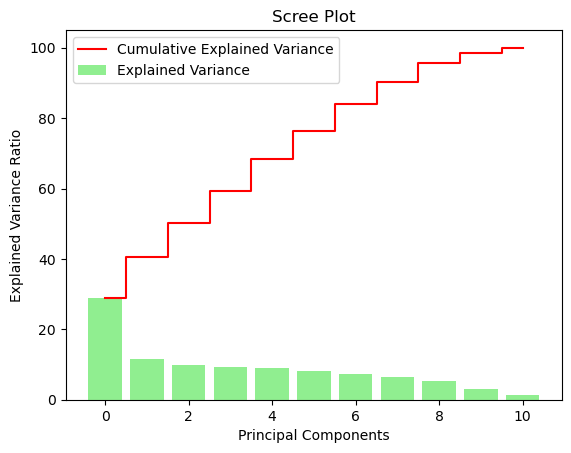

In [41]:
###scree plot
plt.bar(range(11),var_exp,align='center', color='lightgreen',label='Explained Variance')
plt.step(range(11),cum_var_exp,where='mid',color='red',label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()


In [42]:
### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_features_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.937922,0.047034,0.138133,0.048652,0.148967,0.697563,-1.024032,-0.543968
1,-1.537628,1.145469,0.094230,-0.048422,0.461800,-0.955380,-0.524654,-0.620916
2,1.344351,-0.169825,0.392163,-0.655759,1.225872,-0.919954,-0.021049,0.272674
3,-1.729875,-1.004628,-0.090788,-0.849659,1.227910,-0.119230,0.472513,0.526951
4,0.043636,0.404991,0.433811,-0.160688,-1.693201,0.838824,1.195919,1.000632


In [43]:
## K means Clustering using PCA transformed data 

## finding optimal K value by K means clustering using ELbow plot.
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

cluster_errors=[]
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans (num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)
    

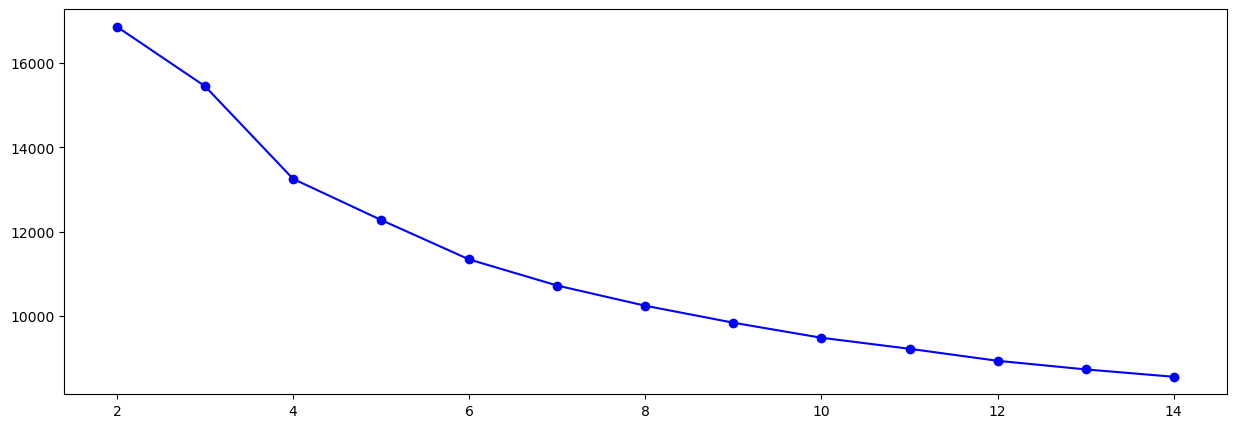

In [44]:
### creating a dataframe of number of clusters and cluster errors
cluster_df = pd.DataFrame({'num_clusters' :cluster_range,'cluster_errors':cluster_errors})

###Elbow plot
plt.figure(figsize=[15,5])
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o',color='b')
plt.show()


In [45]:
### Applying Kmeans clustering for the optimal number of clusters obtained above.
kmeans= KMeans(n_clusters=3,random_state=100)
kmeans.fit(pca_df)


KMeans(n_clusters=3, random_state=100)

In [47]:
###creating a dataframe of datalabels

label=pd.DataFrame(kmeans.labels_,columns=['Label'])


In [48]:
###joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,1.937922,0.047034,0.138133,0.048652,0.148967,0.697563,-1.024032,-0.543968,2
1,-1.537628,1.145469,0.094230,-0.048422,0.461800,-0.955380,-0.524654,-0.620916,1
2,1.344351,-0.169825,0.392163,-0.655759,1.225872,-0.919954,-0.021049,0.272674,2
3,-1.729875,-1.004628,-0.090788,-0.849659,1.227910,-0.119230,0.472513,0.526951,1
4,0.043636,0.404991,0.433811,-0.160688,-1.693201,0.838824,1.195919,1.000632,0


In [49]:
kmeans_df['Label'].value_counts()

1    1016
0     699
2     525
Name: Label, dtype: int64

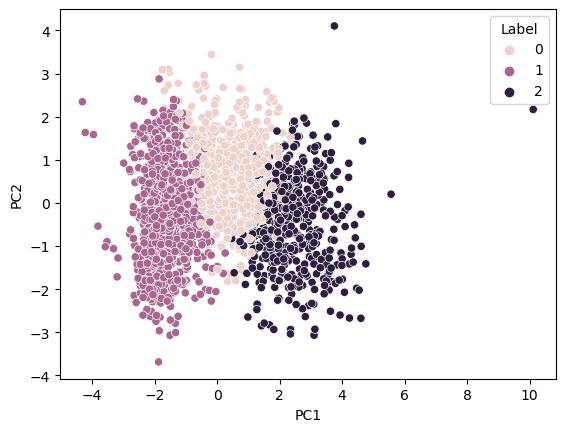

In [50]:
### visuallising the clusters formed 
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Label',data=kmeans_df)
plt.show()

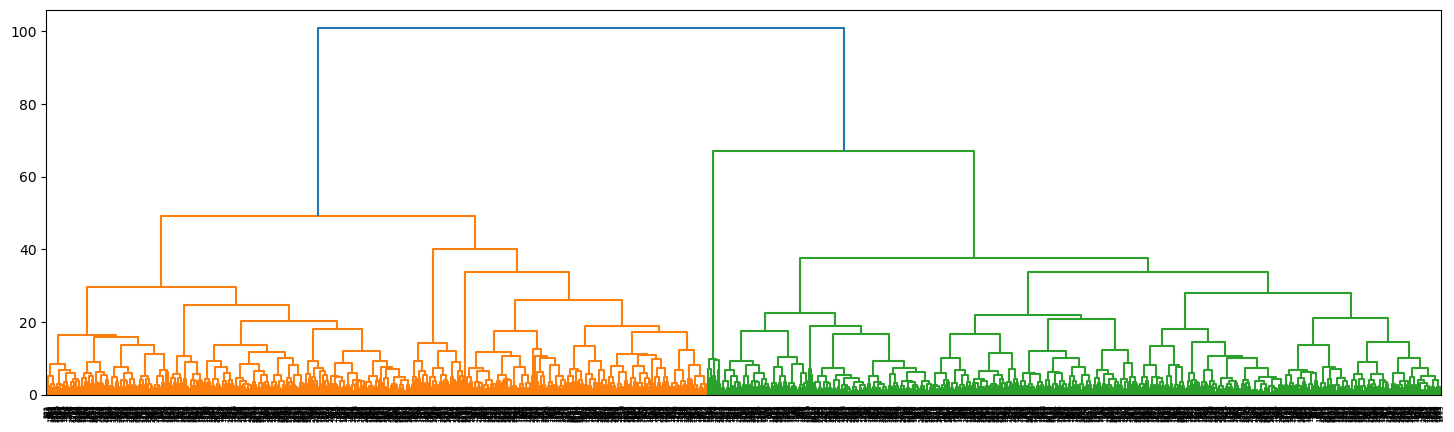

In [53]:
### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by
### doing bivariate analysis between the cluster label and different features and write your observations.
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 


plt.figure(figsize=[18,5])
merg = sch.linkage(scaled_features, method='ward')
sch.dendrogram(merg,leaf_rotation=90,)
plt.xlabel=('Datapoints')
plt.ylabel=('Euclidean distance')
plt.show()



In [54]:
###computing sillhouette score for aggloomerative clustering 

from sklearn.metrics import silhouette_score 

In [56]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(scaled_features_df)
    labels = hier.fit_predict(scaled_features_df)
    print(i,silhouette_score(scaled_features_df,label))
    

2 0.15290699982280345
3 0.15290699982280345
4 0.15290699982280345
5 0.15290699982280345
6 0.15290699982280345
7 0.15290699982280345
8 0.15290699982280345
9 0.15290699982280345
10 0.15290699982280345
11 0.15290699982280345
12 0.15290699982280345
13 0.15290699982280345
14 0.15290699982280345


In [57]:
###Building hierarchial clustering model using the optimal cluster as 3 using original data 

hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

hie_cluster_model = hie_cluster.fit(scaled_features_df)


In [60]:
## creating a dataframe of the labels

df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [62]:
### joining the label dataframe with unscaled initial cleaned dataframe.(dfc)


df_hier = df.join(df_label1)
df_hier.head()

,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,Age,Labels
0,2,4,58138.0,58,7,0,1705,25,0,1,65,0
1,2,4,46344.0,38,5,0,33,6,2,0,68,1
2,2,5,71613.0,26,4,0,818,21,0,0,57,0
3,2,5,26646.0,26,6,0,58,8,1,0,38,1
4,4,3,58293.0,94,5,0,437,19,1,0,41,0


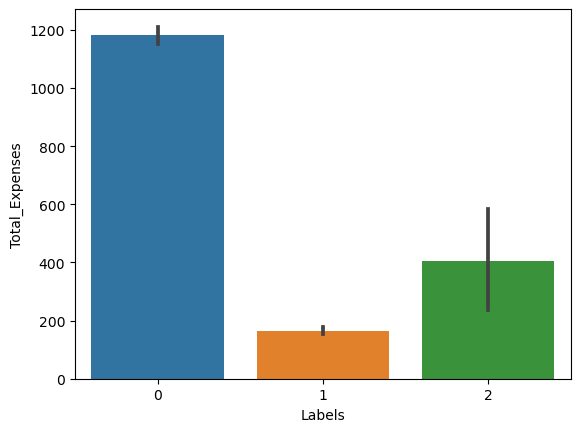

In [63]:
### Visualizing and interpretation of the results

sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()


In [ ]:
#### The total number of Purchases is also much higher for customers from cluster 0 compared to cluster 1 and 2


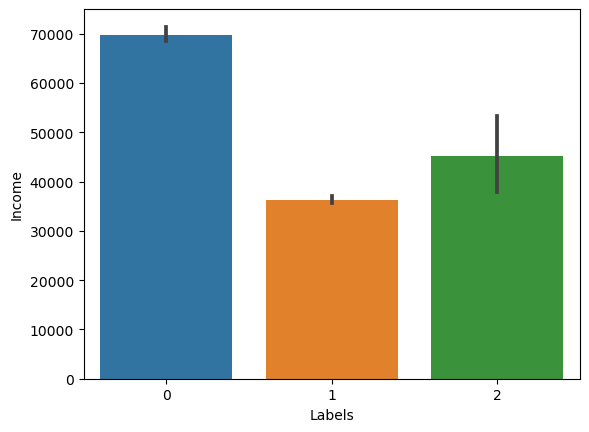

In [64]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()


In [ ]:
#### The income is higher for cluster 0 than cluster 1 and 2.

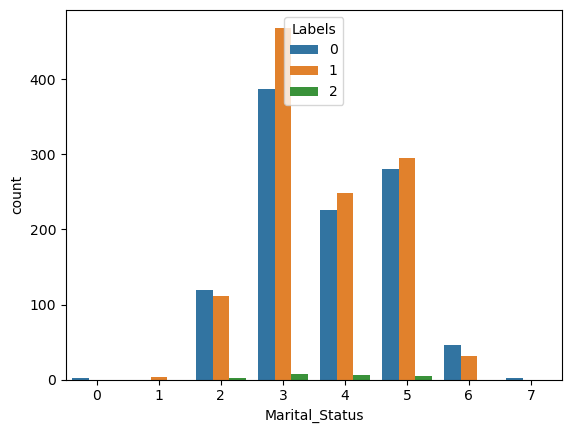

In [65]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)
plt.show()


In [ ]:
#### We can observe that most of the customers who are in a relationship fall under cluster 0.

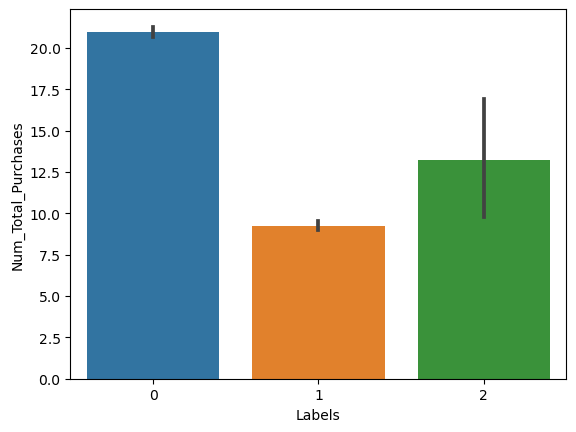

In [68]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()

In [ ]:
### The total number of purchases is higher for customers from cluster 0 compared to cluster 1 and 2.
### We can conclude that the customers who belong to cluster 0 does maximum purchases , have spend maximum amount and maximum income
#### Where as customers belonging to cluster 1 has the least Total_expenses,minimum balance and does minimum purchases compared 
### to other two clusters 
### Customers belonging to cluster 2 does have average purchase and average income.